# SPORTS INJURIES DATA PROJECT  
## BY RUIPU HUANG Z5217369





  







In [3]:
%pylab inline
import pandas as pd
import seaborn
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.patches as mpatches


Populating the interactive namespace from numpy and matplotlib


### load my first data set- '2018 National Electronic Injury Surveillance System data' to jupyter memory 

In [41]:
data = pd.read_excel("D:/2018data.xlsx",index_col ="Product Groupings" )
data2 =pd.read_excel("D:/2018data.xlsx")

### delete unwanted data




In [42]:
dt = data.dropna(axis='rows')
data21 = data2.dropna(axis='rows')

In [43]:
dt.head(10)

,Estimated Number of Injuries*,CV*,Number of Injuries,All Ages,0-4,5-14,15-24,25-64,65+,Male,Female,Treated & Rel.,Hosp. & DOA
Product Groupings,,,,,,,,,,,,,
All Nursery Equipment,93379.0,0.14,3344.0,93379.0,69774.0,2400.0,3653.0,14844.0,2709.0,43839.0,49540.0,88627.0,4752.0
All Toys,224704.0,0.11,7275.0,224704.0,82717.0,82230.0,13919.0,38880.0,6959.0,125856.0,98848.0,217242.0,7462.0
"ATV's, Mopeds, Minibikes, etc.",201170.0,0.09,4245.0,201170.0,2765.0,37002.0,52973.0,89793.0,18581.0,144966.0,56204.0,167032.0,34138.0
Amusement Attractions (incl. Rides),42329.0,0.19,1297.0,42329.0,7318.0,19689.0,6772.0,8181.0,368.0,19175.0,23154.0,41251.0,1079.0
"Barbecue Grills, Stoves, Equipment",22908.0,0.10,521.0,22908.0,3690.0,2110.0,2036.0,12696.0,2376.0,14508.0,8400.0,20652.0,2257.0
"Baseball, Softball",168906.0,0.11,4614.0,168906.0,2684.0,70895.0,50711.0,40897.0,3714.0,105424.0,63482.0,164391.0,4515.0
Basketball,435452.0,0.09,13580.0,435452.0,1768.0,150613.0,200310.0,80646.0,2116.0,353562.0,81890.0,429390.0,6062.0
"Beach, Picnic, Camping Equipment",26762.0,0.11,621.0,26762.0,2966.0,4884.0,1940.0,11835.0,5136.0,12197.0,14564.0,25491.0,1270.0
Bicycles & Accessories,424346.0,0.12,11344.0,424346.0,13708.0,114235.0,62636.0,193590.0,40144.0,314682.0,109664.0,375994.0,48352.0


In [44]:
d1 = dt['Estimated Number of Injuries*']

In [45]:
s1 = pd.Series(d1)

## Numbers of injury Bar chart

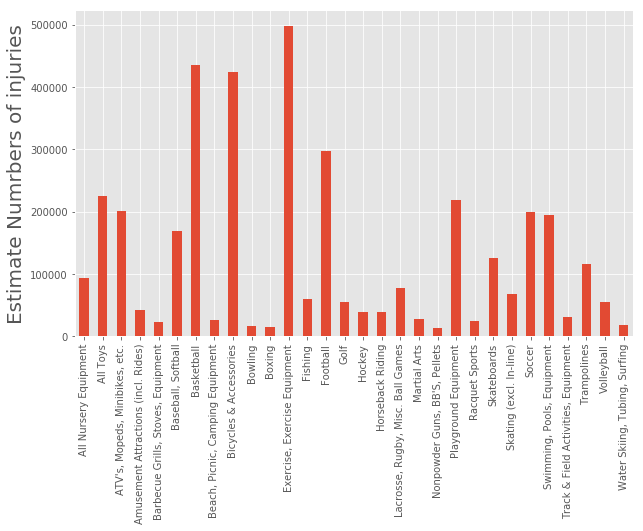

In [24]:
plt.style.use('ggplot')
d1.T.plot(kind='bar')
plt.ylabel('Estimate Numrbers of injuries',fontsize=20)
matplotlib.rc('xtick', labelsize=10) 
plt.rcParams['figure.figsize']=(10,6)

## DISCRETE DISTRIBUTION BY AGE DIAGRAM

In [46]:
dr = dt.iloc[:, 3:9]

#### calculate the percentage by my perc(percentage）function

In [47]:
def perc(num):
    return num/dt["All Ages"]*100
dr1 = dr.apply(perc)
dr2 = dr1.iloc[:,1:6]

In [48]:
df = pd.DataFrame(dr2)

dic1 = df.to_dict('split')['data']
dic2 = df.to_dict('split')['index']

#### More calculation here,Use matplotlib to calculate the length of each bar and plot it 

In [55]:
plt.style.use('ggplot')
def byage(results, category_names):
    category_names = ['0-4','5-14','15-24','25-64','65+']
    results = dic1

    labels = list(dic2)
    a1 = np.array(list(dic1))
    a1_cum = a1.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, a1.shape[1]))
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(a1, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = a1[:, i]
        starts = a1_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9,
                label=colname, color=color)
        
        xcenters = starts + widths /2
        xlabel('Pertageof injuries by age groups')
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax






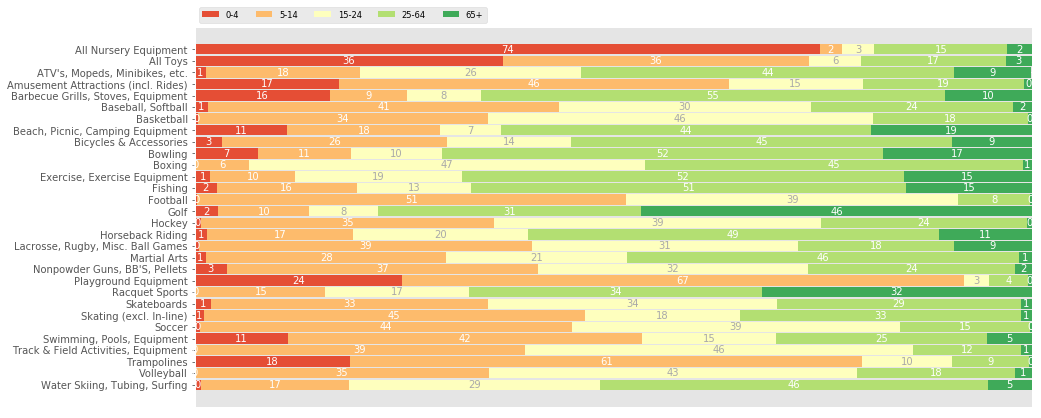

In [54]:
byage(dic1, 'category_names'); 

In [57]:
df2 = dt.iloc[:, 4:9]

In [58]:
df2['0-4'].sum()

306283.0

#### A pie chart to indicated which group of people are most easly get hurt

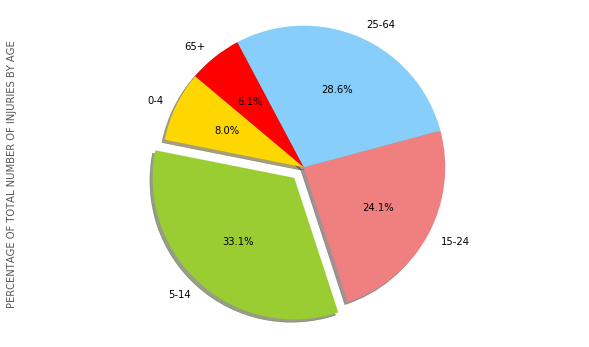

In [63]:
labels = '0-4', '5-14', '15-24', '25-64','65+'
sizes = [df2['0-4'].sum(), df2['5-14'].sum(), df2['15-24'].sum(), df2['25-64'].sum(),df2['65+'].sum()]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0, 0.1, 0, 0,0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ylabel("PERCENTAGE OF TOTAL NUMBER OF INJURIES BY AGE",fontsize=10)
plt.axis('equal')
plt.show()
plt.rcParams['figure.figsize']=(10,6)

### Heatmap

In [680]:
cross = dt.iloc[:, 4:9]

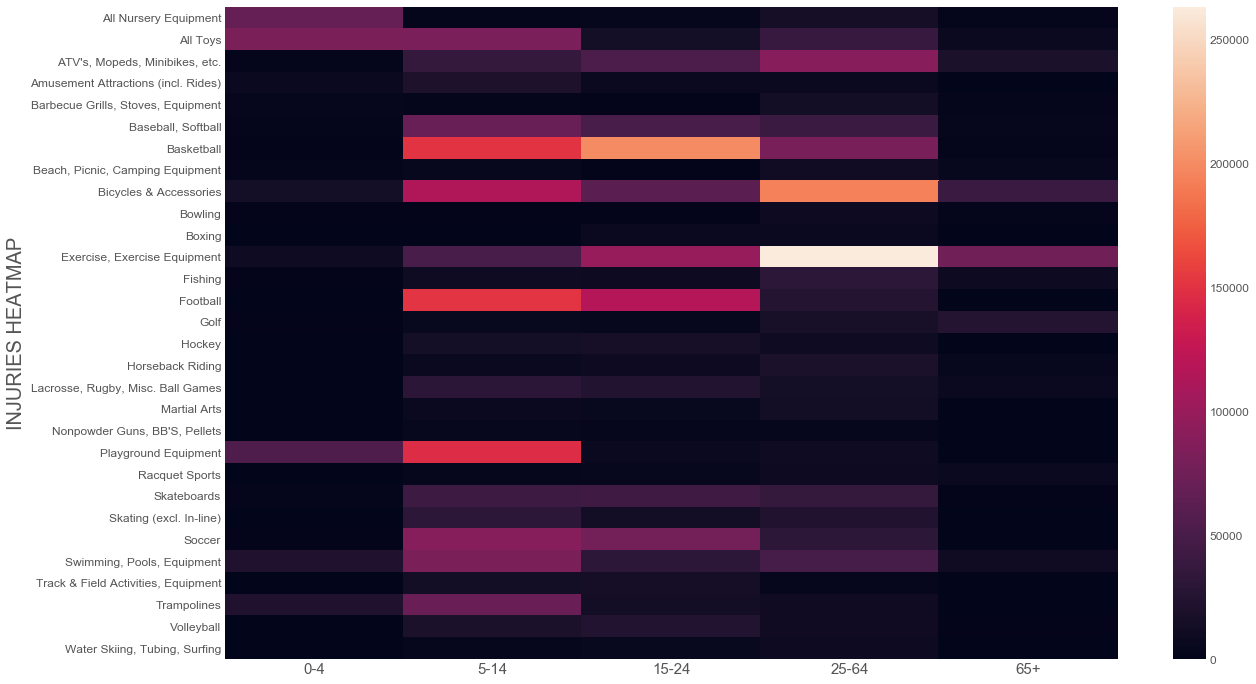

In [1032]:
seaborn.heatmap(cross)
ylabel('INJURIES HEATMAP',fontsize=20 );

## Import more datasets to do longitudinal comparision from 2015 to 2018

In [65]:
d2015 = pd.read_excel("C:/Users/70922/1161/2015.xlsx").dropna(axis='rows')
d2016 = pd.read_excel("C:/Users/70922/1161/2016.xlsx",).dropna(axis='rows')
d2017 = pd.read_excel("C:/Users/70922/1161/2017.xlsx").dropna(axis='rows')
d2018 = pd.read_excel("C:/Users/70922/1161/2018.xlsx").dropna(axis='rows')

In [66]:
e15 = d2015['Estimated Number of Injuries*']
e16 = d2016['Estimated Number of Injuries*']
e17 = d2017['Estimated Number of Injuries*']
e18 = d2018['Estimated Number of Injuries*']

### Sum up the yearly data to compare the total number of injuries between years

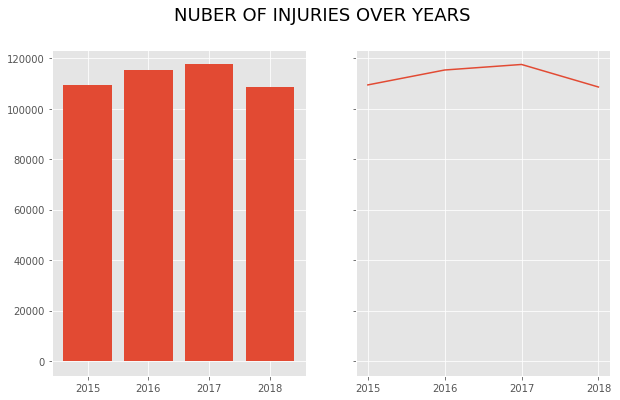

In [68]:
data = {'2015':d2015['Number of Injuries*'].sum(), '2016':d2016['Number of Injuries*'].sum(),'2017': d2017['Number of Injuries*'].sum(),'2018':dt['Number of Injuries'].sum()}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
axs[0].bar(names, values)
axs[1].plot(names, values)
fig.suptitle('NUBER OF INJURIES OVER YEARS', fontsize=18);

Histogram to indicate the distribution of estimated numbers of incidents over years

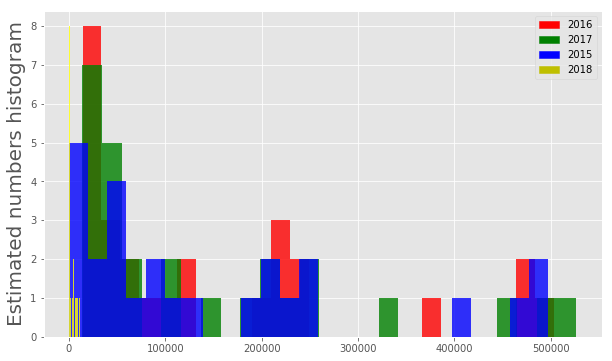

In [70]:
hist(e16,histtype="stepfilled",
            bins=25, alpha=0.8,color= 'red', stacked=True)
hist(e17,histtype="stepfilled",
            bins=25, alpha=0.8,color= 'green', stacked=True)
hist(e15,histtype="stepfilled",
            bins=25, alpha=0.8,color= 'blue', stacked=True)
hist(dt['Number of Injuries'],histtype="stepfilled",
            bins=25, alpha=0.8,color= 'yellow', stacked=True)
r= mpatches.Patch(color='red', label='2016')
g= mpatches.Patch(color='g', label='2017')
b= mpatches.Patch(color='b', label='2015')
y =mpatches.Patch(color='y', label='2018')
plt.legend(handles=[r,g,b,y])
ylabel('Estimated numbers histogram',fontsize=20 )
plt.show()

## the comparison of each kind during these years

In [73]:
e15f = pd.DataFrame(e15)
e15c = e15f.rename(columns={'Estimated Number of Injuries*':'2015'})
e16f = pd.DataFrame(e16)
e16c = e16f.rename(columns={'Estimated Number of Injuries*':'2016'})
e17f = pd.DataFrame(e17)
e17c = e17f.rename(columns={'Estimated Number of Injuries*':'2017'})
e18f = pd.DataFrame(e18)
e18c = e18f.rename(columns={'Estimated Number of Injuries*':'2018'}) 


In [76]:
dfc = pd.concat([e15c,e16c,e17c,e18c],axis=1,sort=True)
dfd = dfc.dropna(axis='rows')

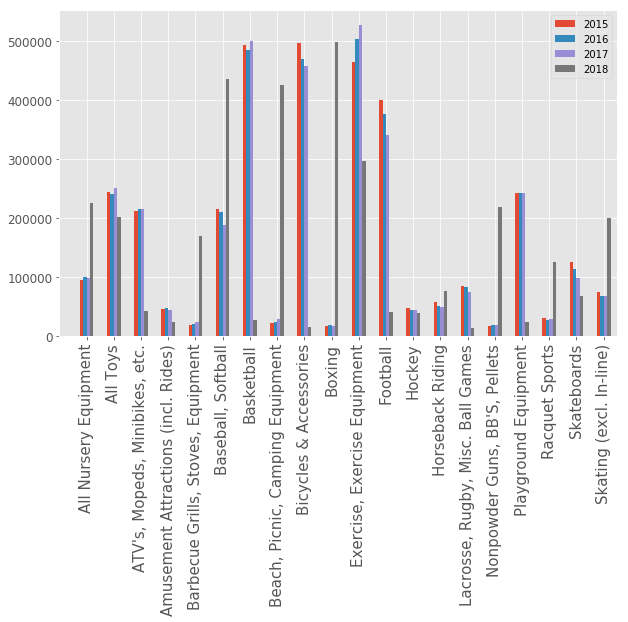

In [91]:
dfd.plot.bar()
labels = list(d2015['Product Groupings'])
xticks(range(0,100),list(d2015['Product Groupings']))
xlim(-1,19.5)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=12)


In [1]:
plt.rcParams['figure.figsize']=(10,6)

NameError: name 'plt' is not defined

In [1]:
pip install RISE ;

Note: you may need to restart the kernel to use updated packages.


Invalid requirement: ''

